### Import Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization

In [2]:
import os

In [3]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

### Read dataset

In [4]:
df = pd.read_csv('Breast_cancer_data.csv')
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


#### View summary of dataset

In [5]:
# view summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


We can see that there are 6 columns in the dataset and there are no missing values.

In [6]:
df.shape

(569, 6)

In [7]:
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [8]:
df['diagnosis'].value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

#### Graph Showing the Count Wheather the Cancer is Benign or Malignant

0 = Benign 
1 = Malignant


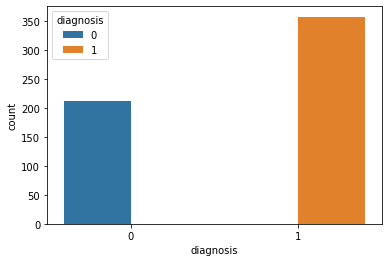

In [9]:
sns.countplot(x = 'diagnosis',hue = 'diagnosis',data = df)
plt.show()

the above graph shows that diagnosis 0 = Benign is less and Diagnosis 1 = Malignant is high

In [10]:
nul = df.isnull().sum()
nul

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

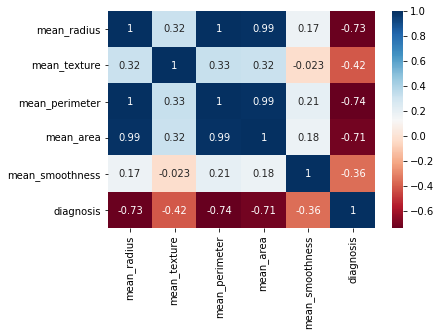

In [11]:
sns.heatmap(df.corr(),cmap="RdBu",annot = True)
plt.show()

Here We can see that Diagnosis is inversely corelated to other variables

So Diagnosis will be our target Variable and rest are our independent Variables

In [12]:
df['diagnosis'].unique()

array([0, 1], dtype=int64)

### Check the distribution of target variable

target variable is diagnosis

check the distribution of the target variable.

In [13]:
# check the distribution of the target variable
df['diagnosis'].value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

The target variable is diagnosis. It contains 2 values - 0 and 1.

0 is for Negative prediction and 1 for Positive prediction.

We can see that the problem is binary classification task.

## Declare feature vector and target variable

In [14]:
X = df[['mean_radius','mean_texture','mean_perimeter','mean_area','mean_smoothness']]
y = df['diagnosis']

### Split dataset into training and test set

In [15]:
# split the dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## LightGBM Model Development and Training¶

We need to convert our training data into LightGBM dataset format(this is mandatory for LightGBM training).

After creating the necessary dataset, we created a python dictionary with parameters and their values.

Accuracy of the model depends on the values we provide to the parameters.

In the end block of code, we simply trained model with 100 iterations.

In [16]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [17]:
# build the lightgbm model
import lightgbm as lgb

In [18]:
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

### Model Prediction

In [19]:
# predict the results
y_pred=clf.predict(X_test)

In [20]:
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1], dtype=int64)

### View Accuracy

In [21]:
# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.9298


Here, y_test are the true class labels and y_pred are the predicted class labels in the test-set.

## Compare train and test set accuracy

Now, I will compare the train-set and test-set accuracy to check for overfitting

In [22]:
y_pred_train = clf.predict(X_train)

In [23]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 1.0000


## Check for Overfitting

In [24]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9298


The training and test set accuracy are quite comparable. So, we cannot say there is overfitting.

## Confusion-matrix

In [25]:
# view confusion-matrix
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 55   8]
 [  4 104]]

True Positives(TP) =  55

True Negatives(TN) =  104

False Positives(FP) =  8

False Negatives(FN) =  4


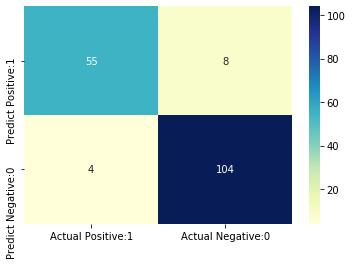

In [26]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## Classification Metrices

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90        63
           1       0.93      0.96      0.95       108

    accuracy                           0.93       171
   macro avg       0.93      0.92      0.92       171
weighted avg       0.93      0.93      0.93       171

